In [179]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('Crime_data.csv')

In [181]:
duplicates = df.duplicated()

# Print the total number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, view the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LOCATION, Cross Street, LAT, LON]
Index: []

[0 rows x 28 columns]


In [182]:
#no duplicate rows to remove

In [183]:
print(df.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


In [184]:
#update data types from object

In [185]:
##update data types
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
df['Date Rptd'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
df['AREA NAME'] = df['AREA NAME'].astype('string')
df['Crm Cd Desc'] = df['Crm Cd Desc'].astype('string')
df['Mocodes'] = pd.to_numeric(df['Mocodes'], errors='coerce').astype('Int64')
df['Vict Sex'] = df['Vict Sex'].astype('string')
df['Vict Descent'] = df['Vict Descent'].astype('string')
df['Premis Desc'] = pd.to_numeric(df['Premis Desc'], errors='coerce').astype('Int64')
df['Weapon Desc'] = df['Weapon Desc'].astype('string')
df['Status'] = df['Status'].astype('string')
df['Status Desc'] = df['Status Desc'].astype('string')
df['LOCATION'] = df['LOCATION'].astype('string')
df['Cross Street'] = df['Cross Street'].astype('string')


In [186]:
print(df.dtypes)

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME         string[python]
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc       string[python]
Mocodes                    Int64
Vict Age                   int64
Vict Sex          string[python]
Vict Descent      string[python]
Premis Cd                float64
Premis Desc                Int64
Weapon Used Cd           float64
Weapon Desc       string[python]
Status            string[python]
Status Desc       string[python]
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION          string[python]
Cross Street      string[python]
LAT                      float64
LON                      float64
dtype: object


In [187]:
# Extract year and month
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

# Yearly trend analysis
yearly_trend = df.groupby('Year').size().reset_index(name='Crime_Count')
print(yearly_trend)

# Monthly trend analysis
monthly_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')
print(monthly_trend)


   Year  Crime_Count
0  2020       199286
1  2021       209157
2  2022       233658
3  2023       110810
    Year  Month  Crime_Count
0   2020      1        18464
1   2020      2        17249
2   2020      3        16148
3   2020      4        15671
4   2020      5        17195
5   2020      6        17018
6   2020      7        17098
7   2020      8        16851
8   2020      9        15620
9   2020     10        16475
10  2020     11        15564
11  2020     12        15933
12  2021      1        16510
13  2021      2        15393
14  2021      3        16300
15  2021      4        16041
16  2021      5        16970
17  2021      6        17132
18  2021      7        18633
19  2021      8        18353
20  2021      9        18331
21  2021     10        19280
22  2021     11        18316
23  2021     12        17898
24  2022      1        18403
25  2022      2        17668
26  2022      3        19672
27  2022      4        19749
28  2022      5        20379
29  2022      6        20

In [188]:
# 1) Fill blanks in the "Weapon Desc" column
df['Weapon Desc'] = df['Weapon Desc'].fillna('No weapon/ weapon unknown')

# 2) Create a new column "Crime-Violence Category"
df['Crime-Violence Category'] = df['Weapon Desc'].apply(
    lambda x: 'Non-violent/ No Weapon' if x == 'No weapon/ weapon unknown' else 'Violent'
)

# 3) Ensure "Crime-Violence Category" is column "S" (right after "Weapon Desc")
columns = list(df.columns)
weapon_desc_index = columns.index('Weapon Desc')  # Get the index of "Weapon Desc"
columns.insert(weapon_desc_index + 1, columns.pop(columns.index('Crime-Violence Category')))
df = df[columns]

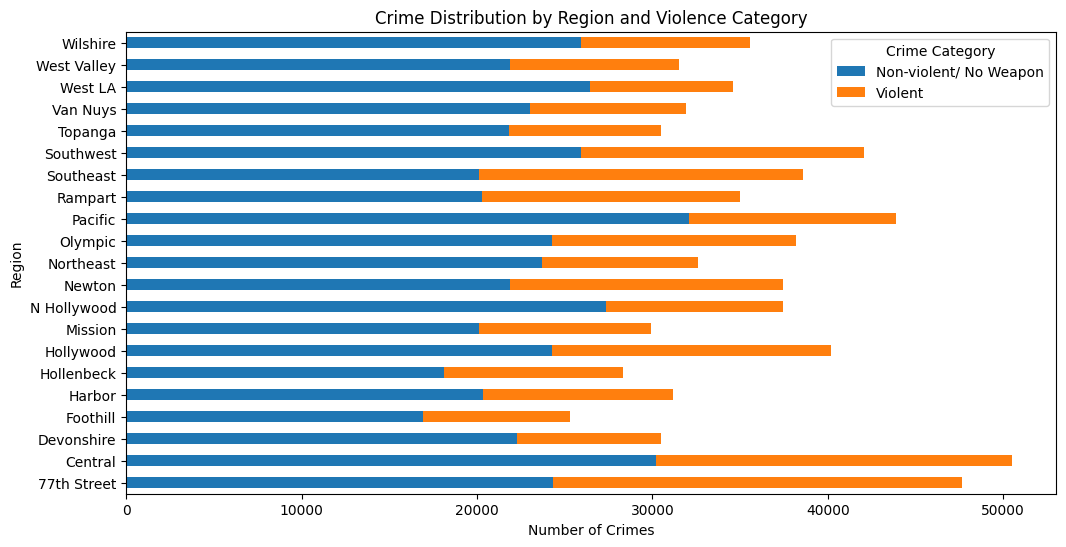

In [189]:
# Step 1: Create a region-wise distribution with a breakdown of violent vs. non-violent crimes
region_distribution = (
    df.groupby(['AREA NAME', 'Crime-Violence Category'])
    .size()
    .reset_index(name='Crime_Count')
)

# Step 2: Pivot data for visualization
region_distribution_pivot = region_distribution.pivot(
    index='AREA NAME', columns='Crime-Violence Category', values='Crime_Count'
).fillna(0)


region_distribution_pivot.plot(
    kind='barh', stacked=True, figsize=(12, 6), title='Crime Distribution by Region and Violence Category'
)
plt.xlabel('Number of Crimes')
plt.ylabel('Region')
plt.legend(title='Crime Category')
plt.show()

In [190]:
# Group by AREA NAME and Crime Violence Category and count occurrences
#region_distribution = (
    #df.groupby(['AREA NAME', 'Crime-Violence Category'])
    #.size()
    #.reset_index(name='Crime_Count')  # Add Crime_Count as a column
#)

# Save the grouped data to a CSV file
#output_file_path = 'region_crime_count.csv'
#region_distribution.to_csv(output_file_path, index=False)

In [191]:

# Group by "Weapon Desc", "Crime-Violence Category", and "Crm Cd Desc" and count occurrences
crime_weapon_distribution = (
    df.groupby(['Weapon Desc', 'Crime-Violence Category', 'Crm Cd Desc'])
    .size()
    .reset_index(name='Crime_Count')  # Add Crime_Count as a column
)

# Save the grouped data to a CSV file
output_file_path = 'crime_weapon_distribution.csv'
crime_weapon_distribution.to_csv(output_file_path, index=False)


In [192]:

import pandas as pd

# Define the mapping for Vict Descent
vict_descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian',
    None: 'Undefined',  # Handle blanks or None
    '': 'Undefined'    # Handle empty strings
}

# Rename the cells in the "Vict Descent" column
df['Vict Descent'] = df['Vict Descent'].map(vict_descent_mapping).fillna('Undefined')





In [193]:
# Create a mapping dictionary for the Vict Sex codes
sex_mapping = {
    'F': 'Female',
    'M': 'Male',
    'X': 'Undefined',
    'H': 'Undefined',
    '': 'Undefined'  # Handle blanks as Undefined
}

# Rename the cells in the "Vict Sex" column and handle NaN values
df['Vict Sex'] = df['Vict Sex'].map(sex_mapping).fillna('Undefined')


In [194]:
df['Vict Sex'].head(25)

0        Female
1          Male
2     Undefined
3        Female
4     Undefined
5        Female
6          Male
7     Undefined
8          Male
9     Undefined
10         Male
11         Male
12         Male
13    Undefined
14       Female
15       Female
16       Female
17       Female
18         Male
19         Male
20         Male
21         Male
22         Male
23       Female
24         Male
Name: Vict Sex, dtype: object

In [195]:
print(df.head())

       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0   10304468 2020-01-08 2020-01-08      2230     3    Southwest          377   
1  190101086 2020-01-01 2020-01-01       330     1      Central          163   
2  200110444 2020-02-13 2020-02-13      1200     1      Central          155   
3  191501505 2020-01-01 2020-01-01      1730    15  N Hollywood         1543   
4  191921269 2020-01-01 2020-01-01       415    19      Mission         1998   

   Part 1-2  Crm Cd                                        Crm Cd Desc  ...  \
0         2     624                           BATTERY - SIMPLE ASSAULT  ...   
1         2     624                           BATTERY - SIMPLE ASSAULT  ...   
2         2     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...   
3         2     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...   
4         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   

   Crm Cd 1  Crm Cd 2 Crm Cd 3 Crm Cd 4  \
0

In [196]:
# Group by 'AREA' or 'AREA NAME'
region_distribution = df.groupby('AREA NAME').size().reset_index(name='Crime_Count')

# Sort by crime count for better visualization
region_distribution = region_distribution.sort_values(by='Crime_Count', ascending=False)
print(region_distribution)


      AREA NAME  Crime_Count
1       Central        50499
0   77th Street        47682
12      Pacific        43880
15    Southwest        42061
6     Hollywood        40184
14    Southeast        38577
11      Olympic        38197
8   N Hollywood        37474
9        Newton        37430
20     Wilshire        35550
13      Rampart        35013
18      West LA        34615
10    Northeast        32582
17     Van Nuys        31941
19  West Valley        31514
4        Harbor        31183
2    Devonshire        30489
16      Topanga        30481
7       Mission        29939
5    Hollenbeck        28311
3      Foothill        25309


In [197]:
# Group by 'Crm Cd Desc' to see the distribution of crime types
crime_type_distribution = df.groupby('Crm Cd Desc').size().reset_index(name='Crime_Count')

# Sort by crime count for better visualization
crime_type_distribution = crime_type_distribution.sort_values(by='Crime_Count', ascending=False)
print(crime_type_distribution)


                                           Crm Cd Desc  Crime_Count
132                                   VEHICLE - STOLEN        80439
4                             BATTERY - SIMPLE ASSAULT        59630
115                                  THEFT OF IDENTITY        48645
21                               BURGLARY FROM VEHICLE        46526
129  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        46157
..                                                 ...          ...
89                                 PICKPOCKET, ATTEMPT            3
46                  DISHONEST EMPLOYEE ATTEMPTED THEFT            2
64                           GRAND THEFT / AUTO REPAIR            2
58                                 FAILURE TO DISPERSE            2
70                                     INCITING A RIOT            1

[138 rows x 2 columns]


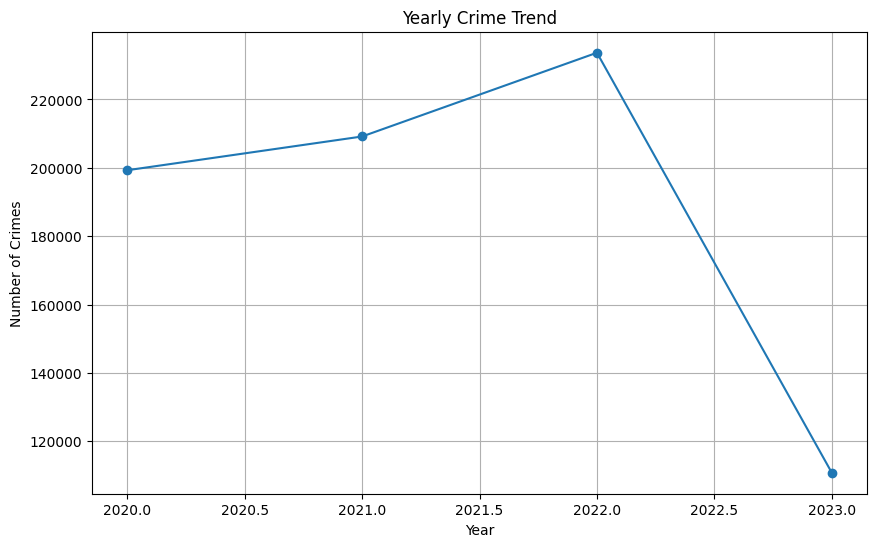

In [198]:
# Plot yearly crime trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend['Year'], yearly_trend['Crime_Count'], marker='o')
plt.title('Yearly Crime Trend')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


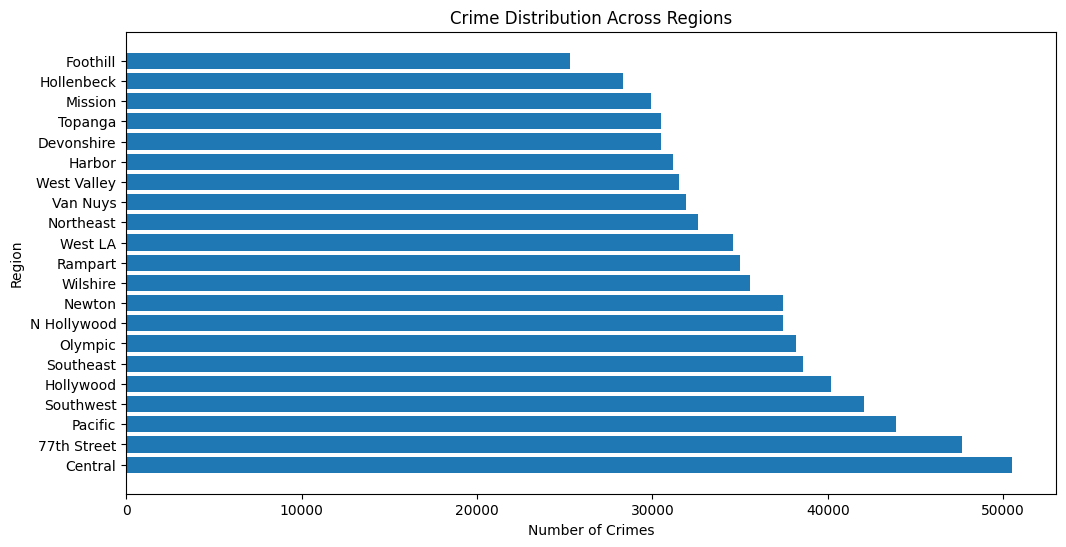

In [199]:
# Bar plot for regional distribution
plt.figure(figsize=(12, 6))
plt.barh(region_distribution['AREA NAME'], region_distribution['Crime_Count'])
plt.title('Crime Distribution Across Regions')
plt.xlabel('Number of Crimes')
plt.ylabel('Region')
plt.show()


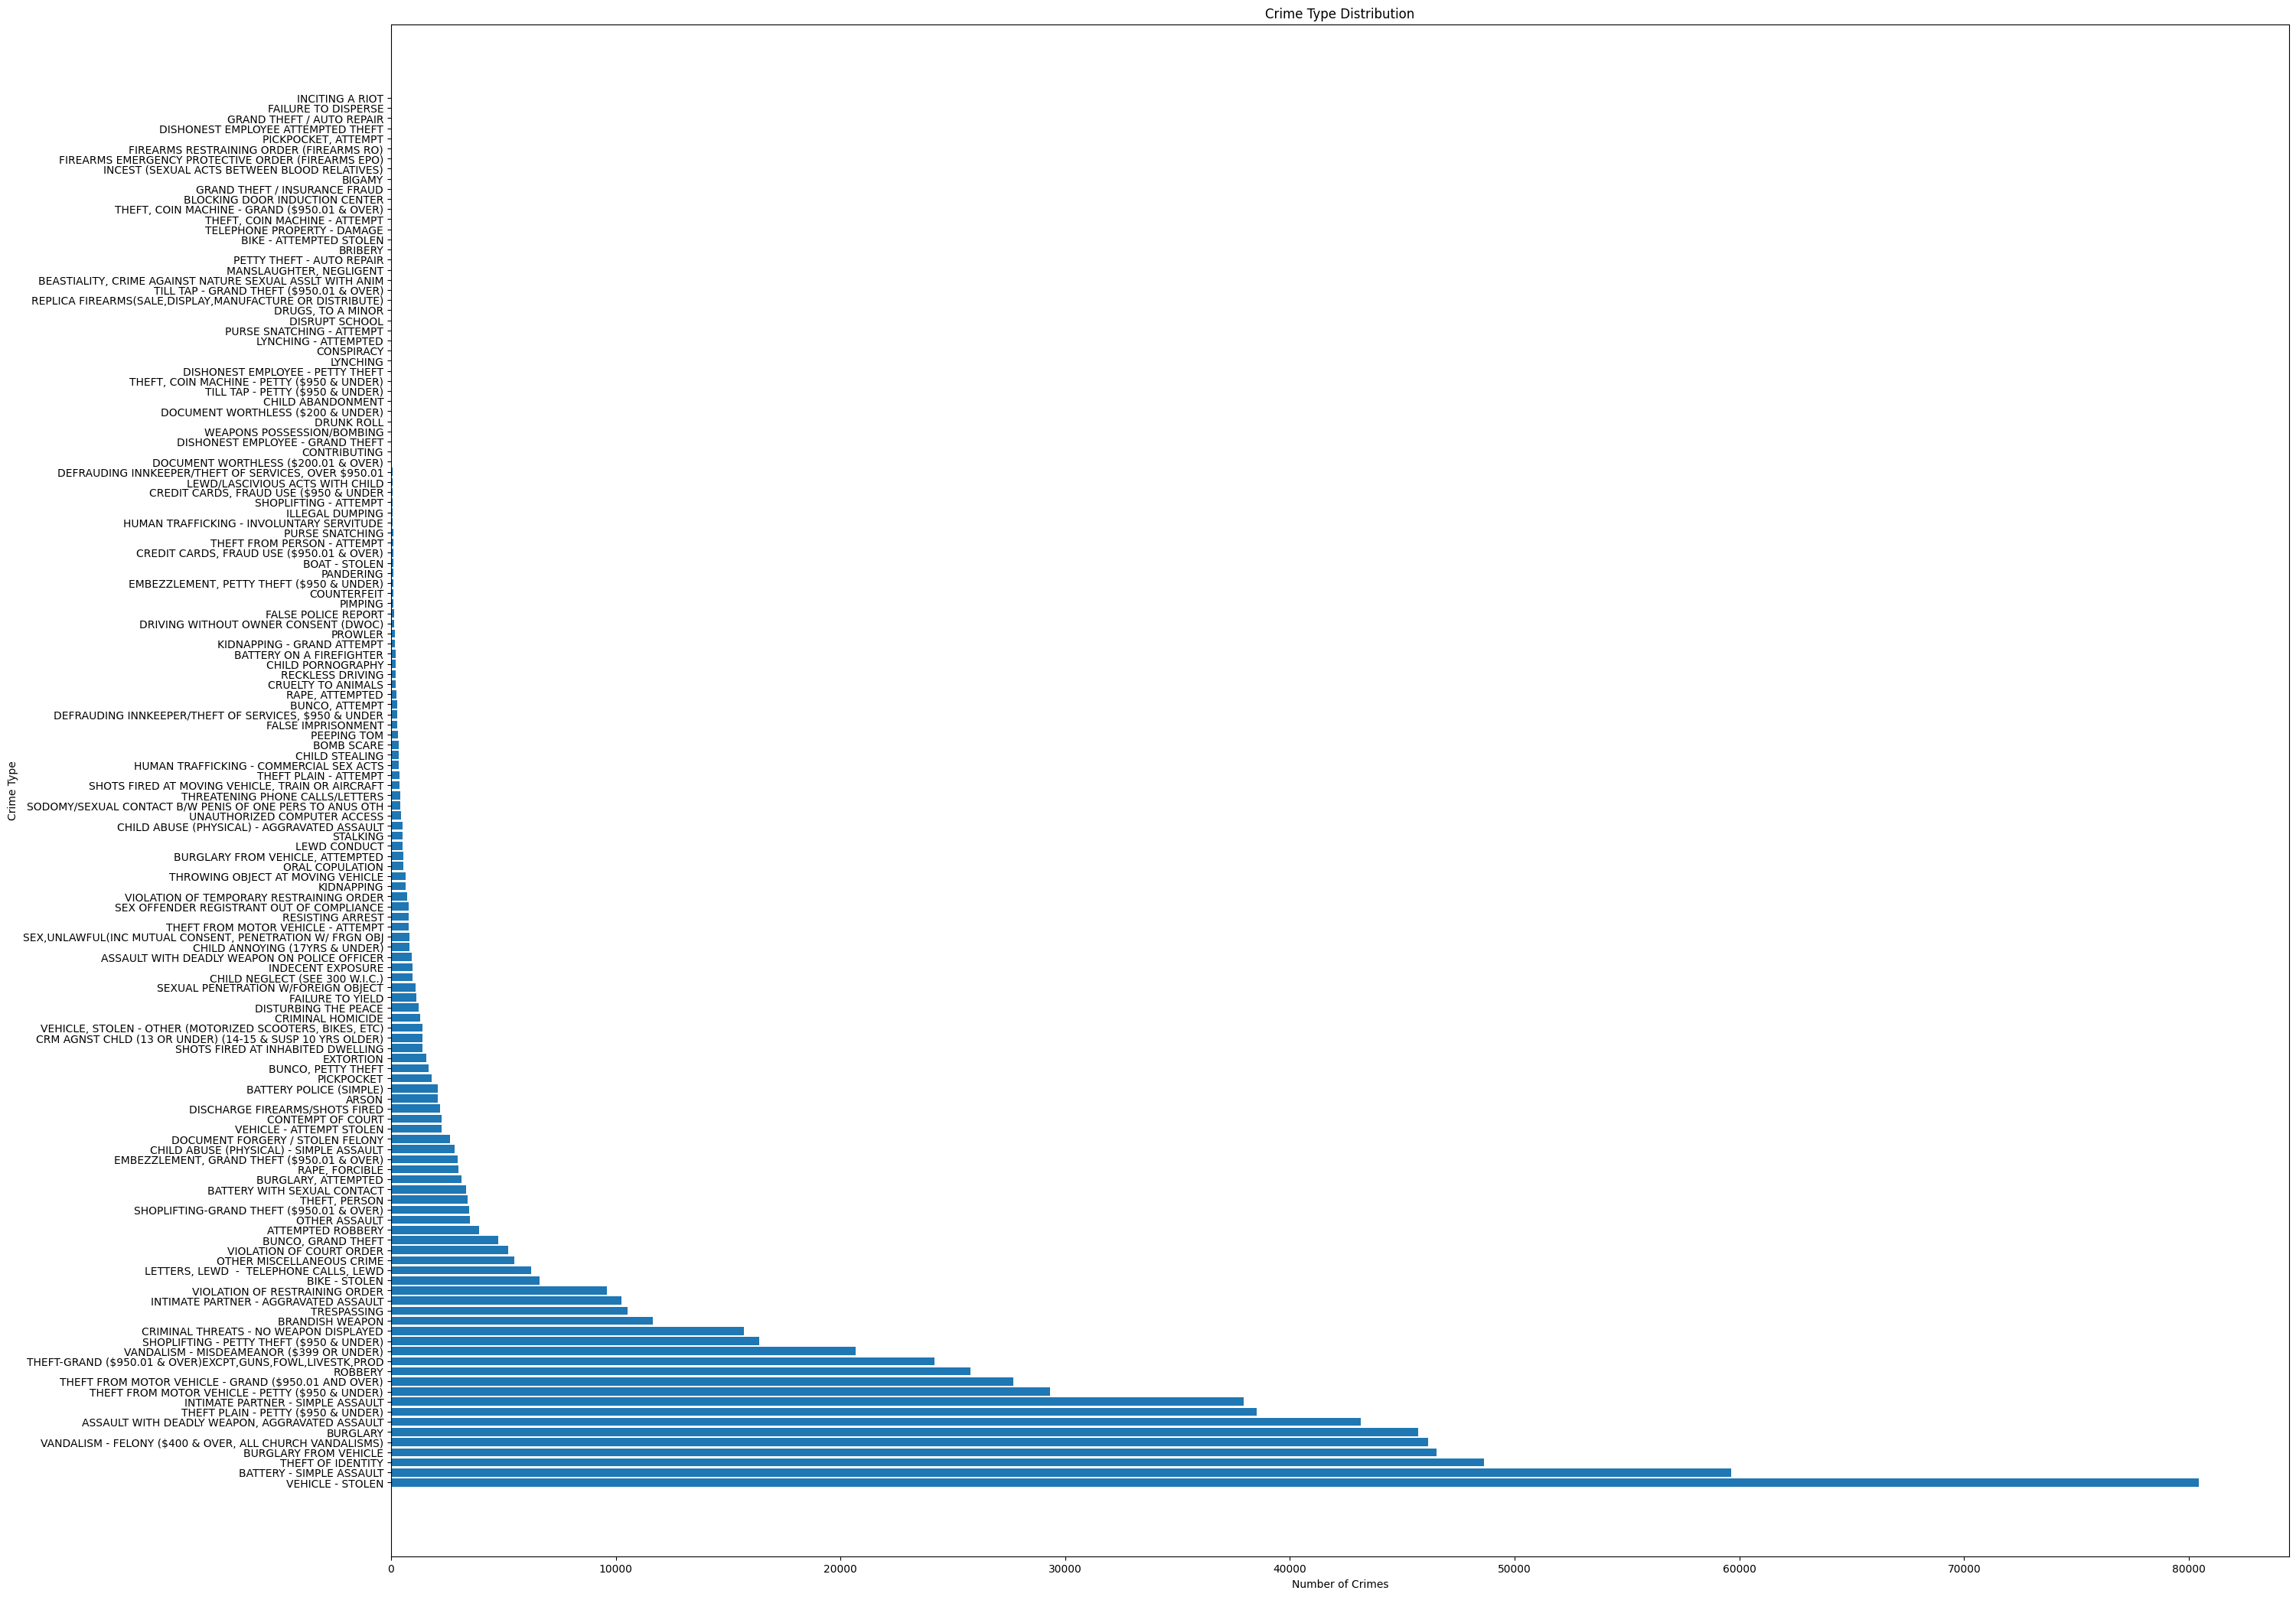

In [200]:
# Bar plot for crime type distribution
plt.figure(figsize=(32, 26))
plt.barh(crime_type_distribution['Crm Cd Desc'], crime_type_distribution['Crime_Count'])
plt.title('Crime Type Distribution')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()


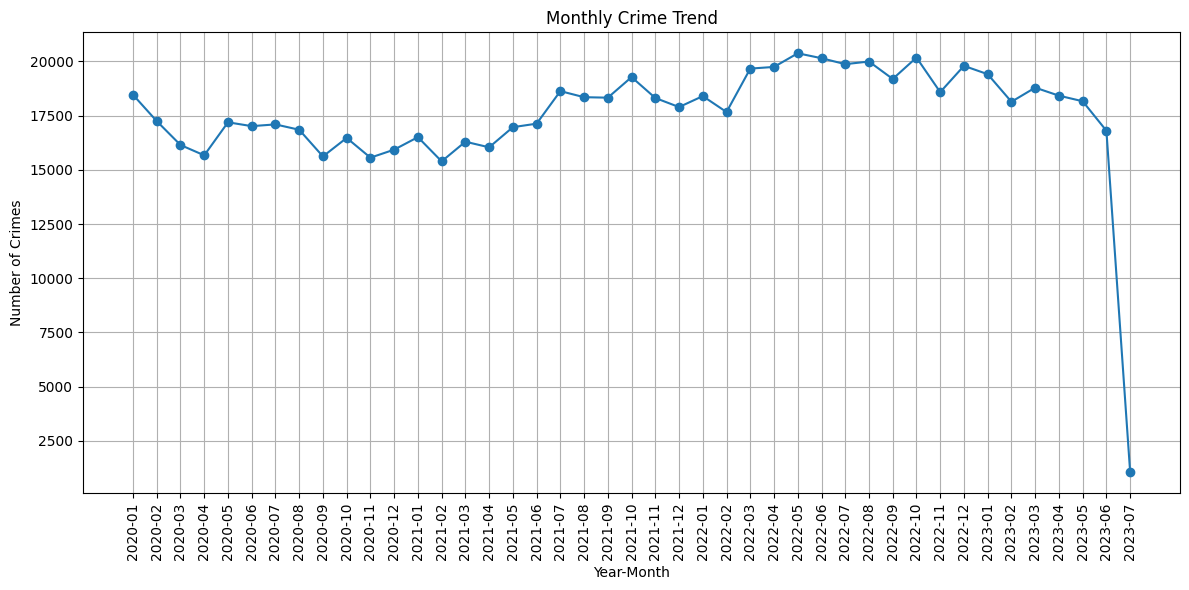

In [201]:
# Create a new column for Year-Month format
df['Year_Month'] = df['DATE OCC'].dt.to_period('M')

# Group by 'Year_Month' and count the occurrences
monthly_trend = df.groupby('Year_Month').size().reset_index(name='Crime_Count')

# Plot monthly crime trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['Year_Month'].astype(str), monthly_trend['Crime_Count'], marker='o')
plt.title('Monthly Crime Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [202]:
print(df.columns)


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Crime-Violence Category', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON', 'Year', 'Month',
       'Year_Month'],
      dtype='object')


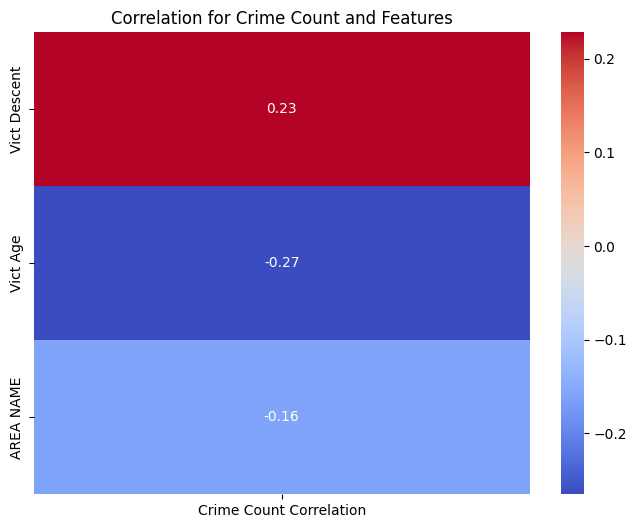

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data_clean as before
data_clean = df.loc[:, ['DR_NO', 'AREA NAME', 'Vict Age', 'Vict Descent']].dropna()
data_clean['Vict Descent'] = data_clean['Vict Descent'].astype('category').cat.codes
data_clean['AREA NAME'] = data_clean['AREA NAME'].astype('category').cat.codes

# Initialize a dictionary to store correlation results
correlation_data = {}

# Calculate correlations for Vict Descent
area_counts = data_clean.groupby('Vict Descent')['DR_NO'].count().reset_index()
area_counts.rename(columns={'DR_NO': 'crime_count'}, inplace=True)
correlation_data['Vict Descent'] = area_counts[['crime_count', 'Vict Descent']].corr().iloc[0, 1]

# Calculate correlations for Vict Age
area_counts = data_clean.groupby('Vict Age')['DR_NO'].count().reset_index()
area_counts.rename(columns={'DR_NO': 'crime_count'}, inplace=True)
correlation_data['Vict Age'] = area_counts[['crime_count', 'Vict Age']].corr().iloc[0, 1]

# Calculate correlations for AREA NAME
area_counts = data_clean.groupby('AREA NAME')['DR_NO'].count().reset_index()
area_counts.rename(columns={'DR_NO': 'crime_count'}, inplace=True)
correlation_data['AREA NAME'] = area_counts[['crime_count', 'AREA NAME']].corr().iloc[0, 1]

# Create a DataFrame for the correlation matrix
correlation_matrix = pd.DataFrame.from_dict(correlation_data, orient='index', columns=['Crime Count Correlation'])

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation for Crime Count and Features')
plt.show()


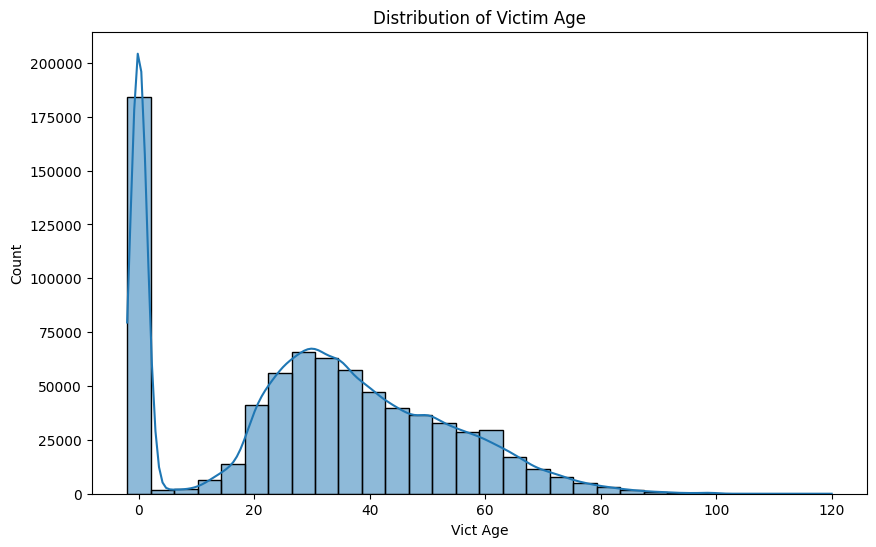

In [204]:
# Distribution of victim age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Vict Age'], bins=30, kde=True)
plt.title('Distribution of Victim Age')
plt.show()


In [208]:
df.to_csv('Crime_Data_Updated_1.csv', index=False)
